# UHECR energy losses

Recreate the figures from De Domenico, M. & Insolia, A., 2012. Influence of cosmological models on the GZK horizon of ultrahigh energy protons. Journal of Physics G: Nuclear and Particle Physics, 40(1), p.015201.

In [1]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
import sys
sys.path.append('../../fancy')
from fancy.propagation.energy_loss import DH, get_source_threshold_energy
import seaborn as sns
import warnings
import h5py
warnings.filterwarnings('ignore')

sns.set_context('talk')
sns.set_style('ticks', 
              {'font.family':'serif', 'font.serif':'Times', 'font.scale' : 5})
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 11
plt.rc('text', usetex=True)

/Users/fran/projects/bayes/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
output_file = 'data/recreate_MD2012.hdf5'

## Functions

In [3]:
zmax = 300 / DH

def omega_gzk(z, Earr, alpha):
    """
    See Equation 10. (E in EeV)
    """
    D = z * DH
    Ei = get_source_threshold_energy(Earr, D)[0]
    return (Ei / Earr)**(1 - alpha)

def integrand(z, Earr, alpha):
    """
    Integrand for Omega_gzk calculation.
    """
    D = z * DH
    Ei = []
    for d in D:
        Ei.append(get_source_threshold_energy(Earr, d)[0])
    return [ei**(1 - alpha) for ei in Ei]
    #Ei = get_source_threshold_energy(Earr, D)[0]
    #return Ei**(1 - alpha)

def Omega_gzk(z, Earr, alpha, norm):
    """
    See Equation 11.
    """
    numerator, err = integrate.fixed_quad(integrand, z, zmax, args = (Earr, alpha))
    denominator = norm
    return numerator / denominator

## Figure 2

Loss length of different processes.

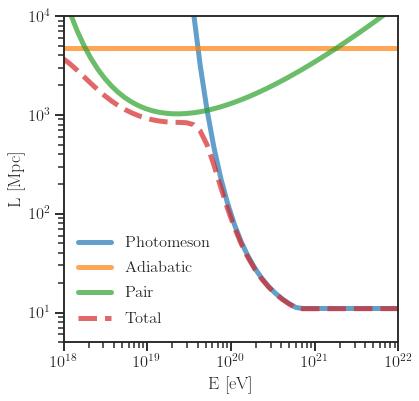

In [5]:
from fancy.propagation.energy_loss import make_energy_loss_plot

z = 0.1
E = np.logspace(np.log(1e18), np.log(1e22), base = np.e)

make_energy_loss_plot(z, E)
plt.savefig('figures/Fig2_MD2012.pdf', dpi = 500, bbox_inches = 'tight')

## Figure 4a

In [15]:
# read in the data
with h5py.File(output_file, 'r') as f:
    fig4a = f['Fig4a']
    Eth_list = fig4a['Eth_list'].value
    Eth = fig4a['Eth'].value
    z = fig4a['z'].value

In [16]:
# # calculation
# N = 50
# z = np.linspace(0, 0.1, N)
# Eth = np.linspace(50, 100, 6)

# alpha = 2.7

# Eth_list = []
# for eth in Eth:
#     om_gzk = []
#     for z_prime in z:
#         om_gzk.append(omega_gzk(z_prime, eth, alpha))
#     Eth_list.append(om_gzk) 
#     print (eth, 'completed')

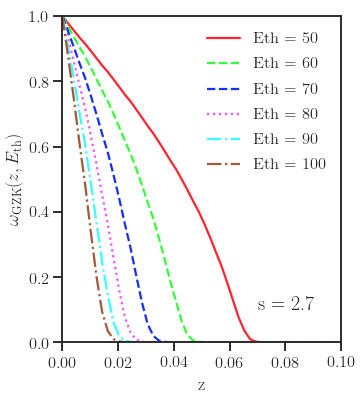

In [17]:
# plot
colors = ['#FD2632', '#35FD3B', '#172FFB', '#FC4FFC', '#38FFFE', '#A35A3B']
linestyles = ['-', '--', '--', ':', '-.', '-.']
plt.figure( figsize = (5, 6) )
for om_gzk, label, color, ls in zip(Eth_list, Eth, colors, linestyles):
    plt.plot(z, om_gzk, label = 'Eth = ' + str(int(label)), color = color, linestyle = ls)
plt.legend(frameon = False)
plt.xlabel('z')
plt.ylabel('$\omega_\mathrm{GZK}(z, E_\mathrm{th})$')
plt.text(0.07, 0.1, 's = 2.7', fontsize = 20)
plt.xlim(0, 0.1)
plt.ylim(0, 1)
plt.savefig('figures/Fig4a_MD2012.pdf', dpi = 500, bbox_inches = 'tight')

In [10]:
# # save the data
# with h5py.File(output_file, 'r+') as f:
#     fig4a = f.create_group('Fig4a')
#     fig4a.create_dataset('z', data = z)
#     fig4a.create_dataset('Eth', data = Eth)
#     fig4a.create_dataset('Eth_list', data = Eth_list)

## Figure 4b

In [11]:
# read in the data
with h5py.File(output_file, 'r') as f:
    fig4b = f['Fig4b']
    Eth_list = fig4b['Eth_list'].value
    alpha = fig4b['alpha'].value
    Eth = fig4b['Eth'].value
    z = fig4b['z'].value

In [12]:
# N = 50
# alpha = [2, 2.2, 2.4, 2.7]
# Eth = [50, 100]
# z = np.linspace(0, 0.1, N)

# Eth_list = []
# for e in Eth:
#     alpha_list = []
#     for a in alpha:
#         om_gzk = []
#         for z_prime in z:
#             om_gzk.append(omega_gzk(z_prime, e, a))
#         alpha_list.append(om_gzk)
#         print(a, 'completed')
#     Eth_list.append(alpha_list)
#     print(e, 'completed')

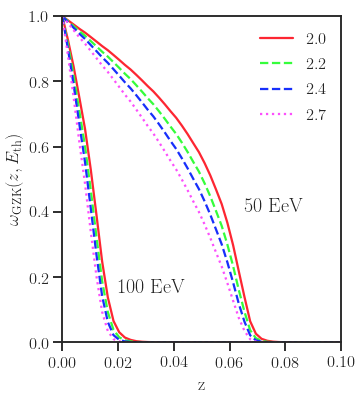

In [14]:
# plot
colors = ['#FD2632', '#35FD3B', '#172FFB', '#FC4FFC']
linestyles = ['-', '--', '--', ':']
plt.figure(figsize = (5, 6))
first = True
for alpha_list in Eth_list:
    for om_gzk, a, color, ls in zip(alpha_list, alpha, colors, linestyles):
        if first:
            plt.plot(z, om_gzk, label = str(a), color = color, linestyle = ls)
        else:
            plt.plot(z, om_gzk, color = color, linestyle = ls)
    first = False
            
plt.xlim(0, 0.1)
plt.ylim(0, 1)
plt.xlabel('z')
plt.ylabel('$\omega_\mathrm{GZK}(z, E_\mathrm{th})$')
plt.legend(frameon = False)
plt.text(0.02, 0.15, '100 EeV', fontsize = 20)
plt.text(0.065, 0.4, '50 EeV', fontsize = 20)
plt.savefig('figures/Fig4b_MD2012.pdf', dpi = 500, bbox_inches = 'tight')

In [34]:
# save the data
with h5py.File(output_file, 'r+') as f:
    fig4b = f.create_group('Fig4b')
    fig4b.create_dataset('z', data = z)
    fig4b.create_dataset('Eth', data = Eth)
    fig4b.create_dataset('alpha', data = alpha)
    fig4b.create_dataset('Eth_list', data = Eth_list)

## Figure 7

In De Domenico, M., 2013. HERMES: Simulating the Propagation of Ultra-High Energy Cosmic Rays. arXiv.org, astro-ph.IM.

In [77]:
N = 50
D = np.linspace(0, 300, N)
Eth = np.linspace(60, 100, 5)

alpha = 2.4

In [78]:
Eth_list = []
for e in Eth:
    om_gzk = []
    for d in D:
        z = d / DH
        om_gzk.append(omega_gzk(z, e, alpha))
    Eth_list.append(om_gzk)
    print(e, 'completed')

60.0 completed
70.0 completed
80.0 completed
90.0 completed
100.0 completed


Text(0,0.5,'$\\omega_\\mathrm{GZK}(z, E_\\mathrm{th})$')

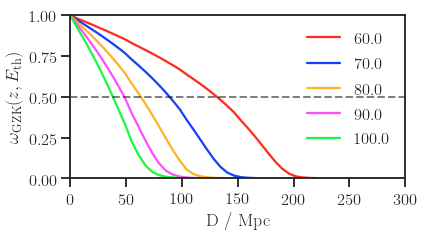

In [79]:
colors = ['#FF2B1B', '#1442FB', '#FFB228', '#FF4FFC', '#1AF842']

plt.figure(figsize = (6, 3))
for om_gzk, e, color in zip(Eth_list, Eth, colors):
    plt.plot(D, om_gzk, label = str(e), color = color)
plt.legend(frameon = False)
plt.axhline(0.5, linestyle = '--', lw = 2, color = 'k', alpha = 0.5)
plt.xlim(0, 300)
plt.ylim(0, 1)
plt.xlabel('D / Mpc')
plt.ylabel('$\omega_\mathrm{GZK}(z, E_\mathrm{th})$')

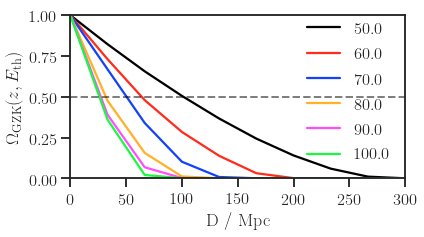

In [52]:
colors = ['k', '#FF2B1B', '#1442FB', '#FFB228', '#FF4FFC', '#1AF842']

plt.figure(figsize = (6, 3))
for Om_gzk, e, color in zip(Eth_list, Eth, colors):
    plt.plot(D, Om_gzk, label = str(e), color = color)
plt.legend(frameon = False)
plt.axhline(0.5, linestyle = '--', lw = 2, color = 'k', alpha = 0.5)
plt.xlim(0, 300)
plt.ylim(0, 1)
plt.xlabel('D / Mpc')
plt.ylabel('$\Omega_\mathrm{GZK}(z, E_\mathrm{th})$')
#plt.savefig('figures/Fig7_MD2013.pdf', dpi = 500, bbox_inches = 'tight')

In [53]:
# save the data
with h5py.File(output_file, 'r+') as f:
    fig7 = f.create_group('Fig7')
    fig7.create_dataset('D', data = D)
    fig7.create_dataset('Eth', data = Eth)
    fig7.create_dataset('alpha', data = alpha)
    fig7.create_dataset('Eth_list', data = Eth_list)

## Testing

In [62]:
zmax = 300 / DH
Earr = 50
alpha = 2.4
numerator, err = integrate.fixed_quad(integrand, 0.01, zmax, args = (Earr, alpha))
print(numerator, err)

0.00013664606385222085 None


In [ ]:
0.00013649477106262228
0.0001365678129507059

In [ ]:
z = 0.01
D = z * DH
#Omega_gzk(z, 50, 2)
integrate.fixed_quad(integrand, z, 1, args = (50, 2))

In [ ]:
from fancy.propagation.energy_loss import beta_bh

z = np.linspace(0, 100, 10)
E = np.logspace(np.log(50), np.log(1e5), 10, base = np.e)

z_prime = 10
E_prime = 1000

#plt.plot(z, [beta_bh(zz, E_prime) for zz in z])
plt.plot(E, [beta_bh(z_prime, e) for e in E])

In [ ]:
from fancy.propagation.energy_loss import beta_adi